In [19]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sympy import *

In [5]:
df = pd.DataFrame({
    'price': [200,300,600],
    'floors': [2,1,3],
    'area': [200,450,550]
})
df

,price,floors,area
0,200,2,200
1,300,1,450
2,600,3,550


We want to make prediction for house:   
Area = ?   
Price = 666,  
Floors = 4

For that task we will use Linear Regresion.  
It means that we want to find Line, which describes our data in the best way

Since we have 2 features of Object, we will use Function of Line in 3D space (2 featues and 1 Target variable)  
Line Equation:  
$f(x1,x2) = a_2x_2 + a_1x_1 + a_0$  
x2 - price  
x1 - floors

First we need to Create Loss function: MSE

In [6]:
a2, a1, a0 = symbols('a2,a1,a0')

point1: x2 = 200, x1 = 2, y = 200 therefore  
a2*200 + a1*2 + a0 = 200  
therefore MSE in that point:  
$(a_2*200 + a_1*2 + a_0 - 200)^2$

In [9]:
dis1 = (a2*200 + a1*2 + a0 - 200)**2
dis2 = (a2*300 + a1*1 + a0 - 450)**2
dis3 = (a2*600 + a1*3 + a0 - 550)**2
number_of_points = 3

In [10]:
MSE = 1/number_of_points * (dis1 + dis2 + dis3)
MSE

0.333333333333333*(a0 + a1 + 300*a2 - 450)**2 + 0.333333333333333*(a0 + 2*a1 + 200*a2 - 200)**2 + 0.333333333333333*(a0 + 3*a1 + 600*a2 - 550)**2

To now find the Best Approximation function, we need to find coefficients that make MSE (Loss function) as low as possible  
to do that we need to use Partial Derivatives of MSE function:

In [12]:
MSEa2 = diff(MSE, a2)
MSEa1 = diff(MSE, a1)
MSEa0 = diff(MSE, a0)

Now we want to find the Minimum of MSE function  
to do that we need to solve the equation, where Partial Devivatives = 0

In [15]:
nonlinsolve([MSEa2, MSEa1, MSEa0], [a2,a1,a0])

{(1.2, -130.0, 220.0)}

so we found the coefficients of the Approximation Equation for our data

In [16]:
x2,x1 = symbols('x2,x1')

a2 = 1.2
a1 = -130
a0 = 220

f = a2*x2 + a1*x1 + a0
f

-130*x1 + 1.2*x2 + 220

f - is our prediction function,  
let us now try to predict area of House with:  
price (x2) = 666  
floors_number (x1) = 4

In [18]:
f.subs({x2: 666, x1: 4})

499.200000000000

Now let's visualize the results:

In [58]:
# drawings preparations
x2_range = np.linspace(0,666,100)
x1_range = np.linspace(0,4, 100)
y_range = []


for x1_iter, x2_iter  in zip(x1_range, x2_range):
    y_iter = f.subs({x2: x2_iter, x1: x1_iter})
    y_range.append(y_iter)

In [61]:
# initial data
df

,price,floors,area
0,200,2,200
1,300,1,450
2,600,3,550


In [62]:
# our prediction:
df_answer = pd.DataFrame({
    'price': [666],
    'floors': [4],
    'area': [f.subs({x2: 666, x1: 4})]
})
df_answer

,price,floors,area
0,666,4,499.200000000000


Visualization of Price/Area pair:

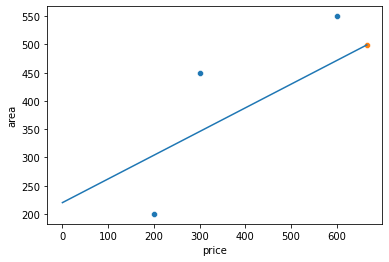

In [63]:
sns.scatterplot(data=df, x='price', y='area')
sns.scatterplot(data=df_answer, x='price', y='area')
plt.plot(x2_range, y_range)

Floors / Area:

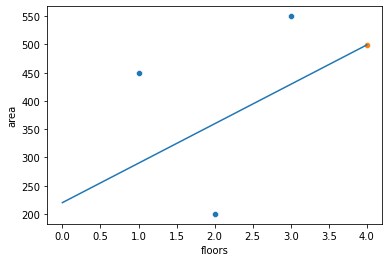

In [64]:
sns.scatterplot(data=df, x='floors', y='area')
sns.scatterplot(data=df_answer, x='floors', y='area')
plt.plot(x1_range, y_range)